<h1><strong>BITCOIN PRICE PREDICTION</strong></h1>

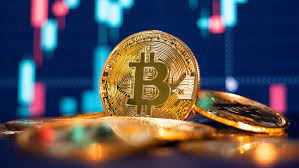

<h2><strong><em>Importing the Required Libraries

In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime as dt
import math
import matplotlib.pyplot as plt
from itertools import cycle 
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
from numpy import array
import datetime as dt
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import pickle

<h2><strong><em>Importing the Dataset

In [321]:
url="https://raw.githubusercontent.com/KartikChhipa01/datasets/main/BTC-USD.csv"
data=pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


<h2><strong><em>The dataset contains 7 columns</strong></em><h2>


* Open - The opening price of the crypto asset for the day
* Close - The cash value of the last transacted price before the market close.
* High - The highest Price of the crypto asset of the day
* Low - The lowest price of the crypto asset for the day 
* Volume - The total number of cryto asset being exchanged in a day
* Adj Close - The adjusted closing price reflects the crypto's value after accounting for any corporate actions




In [322]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [323]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [324]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Checking for null values in the dataframe

In [325]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Converting the Date column to datetime format

In [326]:
data['Date']=pd.to_datetime(data['Date'])

In [327]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


<h1><strong><em>Exploratory Data Analysis

<h3><strong>Bitcoin Price Trend Graph

In [328]:
fig=px.line(data,x='Date',y='Adj Close',height=450,width=800)
fig.show()

<h3><strong>Bitcoin Price Trend Candle Stick Graph

In [329]:
fig=go.Figure(data=[go.Candlestick(x=data['Date'],close=data['Adj Close'],open=data['Open'],high=data['High'],low=data['Low'])])
fig.update_layout(height=450,width=800)
fig.show()

<h3><strong>Making Predictions from Last One Year Data

In [330]:
X=data[['Date','Adj Close']]

In [331]:
X_copy=X.copy()
X_copy=X_copy[X_copy['Date']>'2021-02-19']
X_copy2=X_copy.copy()

In [332]:
del X_copy['Date']
scaler=MinMaxScaler(feature_range=(0,1))
X_copy=scaler.fit_transform(np.array(X_copy).reshape(-1,1))
print(X_copy.shape)

(365, 1)


In [392]:
pickle.dump(scaler,open('scaler.sav','wb'))

In [333]:
X_copy_train,X_copy_test=train_test_split(X_copy,test_size=0.3,shuffle=False)

In [334]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

<h3><strong>Cross Validation using TimeSeriesSplit

Here I have performed cross validation to determine the best model using the TimeSeriesSplit method. The below image depicts how TimeSeriesSplit is done. The test data and train data are added after each split

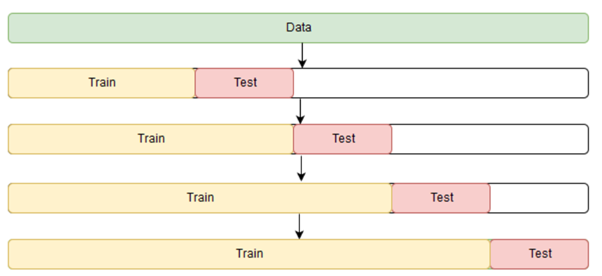

<h3><strong><em>Regression Models</strong></em></h3>


1. XGBoost Regressor
2. LGBM Regressor
3. Random Forest Regressor
4. Decision Tree Regressor



<h3><strong><em>Metrics Used for evaluation</strong></em>


1.   Mean Squared Error
2.   Mean Absolue Error



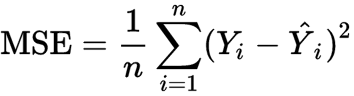

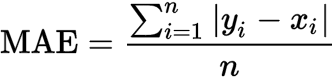

In [335]:
model_names=['XGBRegressor','LGBMRegressor','RandomForestRegressor','DecisionTreeRegressor']
models=[xgb.XGBRegressor(),lgb.LGBMRegressor(),RandomForestRegressor(),DecisionTreeRegressor()]
mae_scores_avg=np.zeros(len(model_names))
mse_scores_avg=np.zeros(len(model_names))

In [336]:
time_step=20
tscv=TimeSeriesSplit(n_splits=5,test_size=30)
for i in range(len(model_names)):
    print("Training and Evaluating the model : ",model_names[i])
    mae_scores=[]
    mse_scores=[]
    for train_index,valid_index in tscv.split(X_copy_train):
        train_cv,valid_cv=X_copy_train[train_index],X_copy_train[valid_index]
        X_train_cv,y_train_cv=create_dataset(train_cv,time_step)
        X_valid_cv,y_valid_cv=create_dataset(valid_cv,time_step)
        model=models[i]
        model.fit(X_train_cv,y_train_cv)
        predictions = model.predict(X_valid_cv)
        mae=mean_absolute_error(y_valid_cv, predictions)
        mse=(mean_squared_error(y_valid_cv, predictions))
        mae_scores.append(mae)
        mse_scores.append(mse)
    mse_scores_avg[i]=np.average(mse_scores)
    mae_scores_avg[i]=np.average(mae_scores)

Training and Evaluating the model :  XGBRegressor
Training and Evaluating the model :  LGBMRegressor
Training and Evaluating the model :  RandomForestRegressor
Training and Evaluating the model :  DecisionTreeRegressor


In [337]:
pd.DataFrame({"Mean Squared Error":mse_scores_avg,"Mean Absolute Error":mae_scores_avg}, index=model_names)

,Mean Squared Error,Mean Absolute Error
XGBRegressor,0.010298,0.083071
LGBMRegressor,0.007976,0.066619
RandomForestRegressor,0.005413,0.062280
DecisionTreeRegressor,0.008287,0.072729


<h2><strong><em>Implementing the Models for Testing

<h3><strong>Using XGBRegressor Model

In [338]:
X_train, y_train = create_dataset(X_copy_train, time_step)
X_test, y_test = create_dataset(X_copy_test, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (235, 20)
y_train:  (235,)
X_test:  (90, 20)
y_test (90,)


In [339]:
model=xgb.XGBRegressor()
model.fit(X_train,y_train)
train_predict=model.predict(X_train).reshape(-1,1)
test_predict=model.predict(X_test).reshape(-1,1)

In [340]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_y_train = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [341]:
train_predict_plot=np.zeros(X_copy.shape)
train_predict_plot[:]=np.nan
train_predict_plot[time_step:len(train_predict)+time_step]=train_predict

In [342]:
test_predict_plot = np.zeros(X_copy.shape)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(X_copy), :] = test_predict

In [343]:
df=pd.DataFrame({'Date':X_copy2['Date'],'Original Close Price':X_copy2['Adj Close'],'Training Predicted Close Price':train_predict_plot.reshape(1,-1)[0].tolist(),'Testing Predicted Close Price':test_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Original Close Price'],df['Training Predicted Close Price'],df['Testing Predicted Close Price']],labels={'value':'Close Price'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price (Using XGBoostRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Note that the MSE and MAE are computed on scaled Prices and not on original Prices

In [344]:
final_rmse_scores=[]
final_mae_scores=[]

In [345]:
predictions = model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))
final_mae_scores.append(mean_absolute_error(y_test, predictions))
final_rmse_scores.append(math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error - MAE : 0.043213285242048906
Root Mean squared Error - RMSE : 0.05706402969619514


<h3><strong>Making Predictions for Future Days

In [346]:
last_days=list(X_copy_test[len(X_copy_test)-time_step:].reshape(1,-1))[0].tolist()

output_days=[]
i=0
pred_days = 10
while(i<pred_days): 
    if(len(last_days)>time_step):
        yhat=model.predict(np.array(last_days[1:]).reshape(1,-1))
        last_days.extend(yhat.tolist())
        last_days=last_days[1:]
        output_days.extend(yhat.tolist())
        i=i+1
    else:
        yhat = model.predict(np.array(last_days).reshape(1,-1))
        last_days.extend(yhat.tolist())
        output_days.extend(yhat.tolist())
        i=i+1
print("Output of predicted next days: ", len(output_days))

Output of predicted next days:  10


In [347]:
last_days_predict_plot=np.zeros((time_step+len(output_days),1))
last_days_predict_plot[:]=np.nan
last_days_predict_plot[:time_step]=np.array(X_copy2.iloc[len(X_copy_train)+len(X_copy_test)-time_step:,1]).reshape(-1,1)
next_days_predict_plot=np.zeros((time_step+len(output_days),1))
next_days_predict_plot[:]=np.nan
next_days_predict_plot[time_step:]=scaler.inverse_transform(np.array(output_days).reshape(-1,1))

In [348]:
df=pd.DataFrame({'Date':pd.date_range(dt.datetime(2022,2,19)-dt.timedelta(days=time_step-1), periods=time_step+len(output_days)),
                 'Close Price Last Days':last_days_predict_plot.reshape(1,-1)[0].tolist(),'Next Days Prediction':next_days_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Close Price Last Days'],df['Next Days Prediction']],labels={'value':'Close Price'})
fig.update_layout(title_text='Prediction of Future Price (Using XGBoostRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h3><strong>Using Random Forest Regressor

In [349]:
X_train, y_train = create_dataset(X_copy_train, time_step)
X_test, y_test = create_dataset(X_copy_test, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (235, 20)
y_train:  (235,)
X_test:  (90, 20)
y_test (90,)


In [350]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
train_predict=model.predict(X_train).reshape(-1,1)
test_predict=model.predict(X_test).reshape(-1,1)

In [351]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_y_train = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [352]:
train_predict_plot=np.zeros(X_copy.shape)
train_predict_plot[:]=np.nan
train_predict_plot[time_step:len(train_predict)+time_step]=train_predict

In [353]:
test_predict_plot = np.zeros(X_copy.shape)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(X_copy), :] = test_predict

In [354]:
df=pd.DataFrame({'Date':X_copy2['Date'],'Original Close Price':X_copy2['Adj Close'],'Training Predicted Close Price':train_predict_plot.reshape(1,-1)[0].tolist(),'Testing Predicted Close Price':test_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Original Close Price'],df['Training Predicted Close Price'],df['Testing Predicted Close Price']],labels={'value':'Close Price'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price (Using RandomForestRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Note that the MSE and MAE are computed on scaled Prices and not on original Prices

In [355]:
predictions = model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))
final_mae_scores.append(mean_absolute_error(y_test, predictions))
final_rmse_scores.append(math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error - MAE : 0.038348547745039485
Root Mean squared Error - RMSE : 0.05231829484111135


<h3><strong>Making Predictions for Future Days

In [356]:
last_days=list(X_copy_test[len(X_copy_test)-time_step:].reshape(1,-1))[0].tolist()

output_days=[]
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(last_days)>time_step):
        
        yhat=model.predict(np.array(last_days[1:]).reshape(1,-1))
        last_days.extend(yhat.tolist())
        last_days=last_days[1:]
       
        output_days.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.array(last_days).reshape(1,-1))
        
        last_days.extend(yhat.tolist())
        output_days.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(output_days))

Output of predicted next days:  10


In [357]:
last_days_predict_plot=np.zeros((time_step+len(output_days),1))
last_days_predict_plot[:]=np.nan
last_days_predict_plot[:time_step]=np.array(X_copy2.iloc[len(X_copy_train)+len(X_copy_test)-time_step:,1]).reshape(-1,1)
next_days_predict_plot=np.zeros((time_step+len(output_days),1))
next_days_predict_plot[:]=np.nan
next_days_predict_plot[time_step:]=scaler.inverse_transform(np.array(output_days).reshape(-1,1))

In [358]:
df=pd.DataFrame({'Date':pd.date_range(dt.datetime(2022,2,19)-dt.timedelta(days=time_step-1), periods=time_step+len(output_days)),
                 'Close Price Last Days':last_days_predict_plot.reshape(1,-1)[0].tolist(),'Next Days Prediction':next_days_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Close Price Last Days'],df['Next Days Prediction']],labels={'value':'Close Price'})
fig.update_layout(title_text='Prediction of Future Price (Using RandomForestRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h3><strong>Using LightGBMRegressor

In [359]:
X_train, y_train = create_dataset(X_copy_train, time_step)
X_test, y_test = create_dataset(X_copy_test, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (235, 20)
y_train:  (235,)
X_test:  (90, 20)
y_test (90,)


In [360]:
model=lgb.LGBMRegressor()
model.fit(X_train,y_train)
train_predict=model.predict(X_train).reshape(-1,1)
test_predict=model.predict(X_test).reshape(-1,1)

In [361]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_y_train = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [362]:
train_predict_plot=np.zeros(X_copy.shape)
train_predict_plot[:]=np.nan
train_predict_plot[time_step:len(train_predict)+time_step]=train_predict

In [363]:
test_predict_plot = np.zeros(X_copy.shape)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(X_copy), :] = test_predict

In [364]:
df=pd.DataFrame({'Date':X_copy2['Date'],'Original Close Price':X_copy2['Adj Close'],'Training Predicted Close Price':train_predict_plot.reshape(1,-1)[0].tolist(),'Testing Predicted Close Price':test_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Original Close Price'],df['Training Predicted Close Price'],df['Testing Predicted Close Price']],labels={'value':'Close Price'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price (Using LGBMRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Note that the MSE and MAE are computed on scaled Prices and not on original Prices

In [365]:
predictions = model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))
final_mae_scores.append(mean_absolute_error(y_test, predictions))
final_rmse_scores.append(math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error - MAE : 0.04774912796236212
Root Mean squared Error - RMSE : 0.0620740981985125


<h3><strong>Making Predictions for Future Days

In [366]:
last_days=list(X_copy_test[len(X_copy_test)-time_step:].reshape(1,-1))[0].tolist()

output_days=[]
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(last_days)>time_step):
        
        yhat=model.predict(np.array(last_days[1:]).reshape(1,-1))
        last_days.extend(yhat.tolist())
        last_days=last_days[1:]
       
        output_days.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.array(last_days).reshape(1,-1))
        
        last_days.extend(yhat.tolist())
        output_days.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(output_days))

Output of predicted next days:  10


In [367]:
last_days_predict_plot=np.zeros((time_step+len(output_days),1))
last_days_predict_plot[:]=np.nan
last_days_predict_plot[:time_step]=np.array(X_copy2.iloc[len(X_copy_train)+len(X_copy_test)-time_step:,1]).reshape(-1,1)
next_days_predict_plot=np.zeros((time_step+len(output_days),1))
next_days_predict_plot[:]=np.nan
next_days_predict_plot[time_step:]=scaler.inverse_transform(np.array(output_days).reshape(-1,1))

In [368]:
df=pd.DataFrame({'Date':pd.date_range(dt.datetime(2022,2,19)-dt.timedelta(days=time_step-1), periods=time_step+len(output_days)),
                 'Close Price Last Days':last_days_predict_plot.reshape(1,-1)[0].tolist(),'Next Days Prediction':next_days_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Close Price Last Days'],df['Next Days Prediction']],labels={'value':'Close Price'})
fig.update_layout(title_text='Prediction of Future Price (Using LGBMRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h3><strong>Using DecisionTreeRegressor

In [369]:
X_train, y_train = create_dataset(X_copy_train, time_step)
X_test, y_test = create_dataset(X_copy_test, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (235, 20)
y_train:  (235,)
X_test:  (90, 20)
y_test (90,)


In [370]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
train_predict=model.predict(X_train).reshape(-1,1)
test_predict=model.predict(X_test).reshape(-1,1)

In [371]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_y_train = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [372]:
train_predict_plot=np.zeros(X_copy.shape)
train_predict_plot[:]=np.nan
train_predict_plot[time_step:len(train_predict)+time_step]=train_predict

In [373]:
test_predict_plot = np.zeros(X_copy.shape)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(X_copy), :] = test_predict

In [374]:
df=pd.DataFrame({'Date':X_copy2['Date'],'Original Close Price':X_copy2['Adj Close'],'Training Predicted Close Price':train_predict_plot.reshape(1,-1)[0].tolist(),'Testing Predicted Close Price':test_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Original Close Price'],df['Training Predicted Close Price'],df['Testing Predicted Close Price']],labels={'value':'Close Price'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price (Using DecisionTreeRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Note that the MSE and MAE are computed on scaled Prices and not on original Prices

In [375]:
predictions = model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))
final_mae_scores.append(mean_absolute_error(y_test, predictions))
final_rmse_scores.append(math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error - MAE : 0.06337931275088154
Root Mean squared Error - RMSE : 0.08240185809587477


Clearly the rmse and mae is much more when Decision Tree Regressor is used this is due to overfitting of the Training Data as visible on the graph

<h3><strong>Making Predictions for Future Days

In [376]:
last_days=list(X_copy_test[len(X_copy_test)-time_step:].reshape(1,-1))[0].tolist()

output_days=[]
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(last_days)>time_step):
        
        yhat=model.predict(np.array(last_days[1:]).reshape(1,-1))
        last_days.extend(yhat.tolist())
        last_days=last_days[1:]
       
        output_days.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.array(last_days).reshape(1,-1))
        
        last_days.extend(yhat.tolist())
        output_days.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(output_days))

Output of predicted next days:  10


In [377]:
last_days_predict_plot=np.zeros((time_step+len(output_days),1))
last_days_predict_plot[:]=np.nan
last_days_predict_plot[:time_step]=np.array(X_copy2.iloc[len(X_copy_train)+len(X_copy_test)-time_step:,1]).reshape(-1,1)
next_days_predict_plot=np.zeros((time_step+len(output_days),1))
next_days_predict_plot[:]=np.nan
next_days_predict_plot[time_step:]=scaler.inverse_transform(np.array(output_days).reshape(-1,1))

In [378]:
df=pd.DataFrame({'Date':pd.date_range(dt.datetime(2022,2,19)-dt.timedelta(days=time_step-1), periods=time_step+len(output_days)),
                 'Close Price Last Days':last_days_predict_plot.reshape(1,-1)[0].tolist(),'Next Days Prediction':next_days_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Close Price Last Days'],df['Next Days Prediction']],labels={'value':'Close Price'})
fig.update_layout(title_text='Prediction of Future Price (Using DecisionTreeRegressor)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h2><strong><em>Implementing LSTM Model

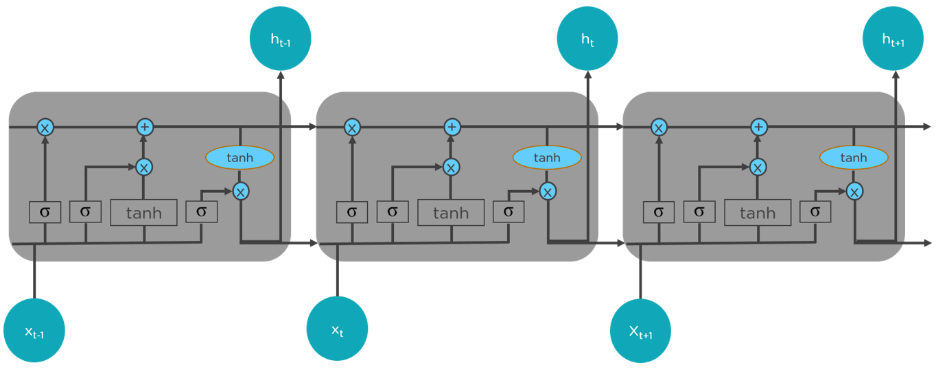

Reshaping X_train to 3 dimensional because keras is a 3D tensor network

In [379]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [380]:
regressor=Sequential()
regressor.add(LSTM(units=20,input_shape=(None,1),activation="tanh"))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
8/8 [==============================] - 3s 9ms/step - loss: 0.1416
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0525
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0201
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 7/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0127
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 10/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 11/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0105
Epoch 12/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 13/200
8/8 [==============================] - 0s 8ms/st

In [381]:
test_predict=regressor.predict(X_test)
train_predict=regressor.predict(X_train)

In [382]:
predictions = regressor.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))
final_mae_scores.append(mean_absolute_error(y_test, predictions))
final_rmse_scores.append(math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error - MAE : 0.033571939452502655
Root Mean squared Error - RMSE : 0.045090515066785096


In [383]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_y_train = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [384]:
train_predict_plot=np.zeros(X_copy.shape)
train_predict_plot[:]=np.nan
train_predict_plot[time_step:len(train_predict)+time_step]=train_predict

In [385]:
test_predict_plot = np.zeros(X_copy.shape)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(X_copy), :] = test_predict

In [386]:
df=pd.DataFrame({'Date':X_copy2['Date'],'Original Close Price':X_copy2['Adj Close'],'Training Predicted Close Price':train_predict_plot.reshape(1,-1)[0].tolist(),'Testing Predicted Close Price':test_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Original Close Price'],df['Training Predicted Close Price'],df['Testing Predicted Close Price']],labels={'value':'Close Price'},width=1400)
fig.update_layout(title_text='Comparision between original close price vs predicted close price (Using LSTM)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h3><strong>Making Predictions for Future Days

In [387]:
last_days=list(X_copy_test[len(X_copy_test)-time_step:].reshape(1,-1))[0].tolist()
train=np.array(last_days)
output_days=[]
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(last_days)>time_step):
        train=np.array(last_days[1:]).astype("float32")
        train=train.reshape(1,-1)
        train=train.reshape((1,time_step,1))
        yhat=regressor.predict(train)
        last_days.extend(yhat[0].tolist())
        last_days=last_days[1:]
       
        output_days.extend(yhat.tolist())
        i=i+1
        
    else:
        train=train.reshape((1,time_step,1))
        yhat = regressor.predict(np.array(last_days).reshape((1,time_step,1)))
        last_days.extend(yhat[0].tolist())
        output_days.extend(yhat.tolist())
        i=i+1
print("Output of predicted next days: -+", len(output_days))

Output of predicted next days: -+ 10


In [388]:
last_days_predict_plot=np.zeros((time_step+len(output_days),1))
last_days_predict_plot[:]=np.nan
last_days_predict_plot[:time_step]=np.array(X_copy2.iloc[len(X_copy_train)+len(X_copy_test)-time_step:,1]).reshape(-1,1)
next_days_predict_plot=np.zeros((time_step+len(output_days),1))
next_days_predict_plot[:]=np.nan
next_days_predict_plot[time_step:]=scaler.inverse_transform(np.array(output_days).reshape(-1,1))

In [389]:
df=pd.DataFrame({'Date':pd.date_range(dt.datetime(2022,2,19)-dt.timedelta(days=time_step-1), periods=time_step+len(output_days)),
                 'Close Price Last Days':last_days_predict_plot.reshape(1,-1)[0].tolist(),'Next Days Prediction':next_days_predict_plot.reshape(1,-1)[0].tolist()})
fig=px.line(df,x=df['Date'],y=[df['Close Price Last Days'],df['Next Days Prediction']],labels={'value':'Close Price'})
fig.update_layout(title_text='Prediction of Future Price (Using LSTM)',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<h2><strong><em>Final Evaluation Comparison of Different Models

In [390]:
pd.DataFrame({"Root Mean Squared Error":final_rmse_scores,"Mean Absolute Error":final_mae_scores}, index=['XGBoostRegressor','RandomForestRegressor','LGBMRegressor','DecisionForestRegressor','LSTM']).style.background_gradient(cmap="Blues")

,Root Mean Squared Error,Mean Absolute Error
XGBoostRegressor,0.057064,0.043213
RandomForestRegressor,0.052318,0.038349
LGBMRegressor,0.062074,0.047749
DecisionForestRegressor,0.082402,0.063379
LSTM,0.045091,0.033572
